# Business Understanding
De organisatie wilt graag inzicht verkrijgen in hun werknemersverloop (attrition). Gezien de scope van de opdracht is het lastig om de motivatie van de organisatie te begrijpen. Er wordt een aanname gedaan dat de organisatie kampt met hoge (on)kosten door het werknemersverloop en zij willen graag preventief kunnen handelen om werknemers te behouden. Ze vragen zich af of de kosten lager kunnen zijn door te investeren op werknemersretentie in plaats van te besteden aan recruitment. De organisatie heeft nog geen oplossing naast het werven van nieuwe werknemers.

# Data Understanding
De aangeleverde data komen uit twee verschillende bronnen; vanuit HR (bestaand) en enquêtes (additioneel). Tevens is een data dictionary meegeleverd, zodat uniforme definities gehanteerd worden. Onderstaand een beknopte opsomming van de data.

* Standaard HR-data waarin belangrijke werknemers data (anoniem) staat
* Tweemaal enquête data; één vanuit de werknemers en één vanuit de managers
* Kloktijden met de start en eind timestamps van de shifts

## Definities van de variabelen

| Variabel                 | Omschrijving                                       | Niveau |
| ------------------------ | -------------------------------------------------- | ------ |
| Age                      | Leeftijd werknemer                                 |        |
| Attrition                | De werknemer is vorig jaar weggegaan               |        |
| BusinessTravel           | Frequentie van zakelijke reizen afgelopen jaar     |        |
| Department               | Afdeling binnen het bedrijf                        |        |
| DistanceFromHome         | Afstand vanaf huis in kilometers (km's)            |        |
| Education                | Educatie niveau                                    | 1. Below college <br> 2. College <br> 3. Bachelor <br> 4. Master <br> 5. Doctor |
| EducationField           | Educatie vakgebied                                 |        |
| EmployeeCount            | Aantal werknemers                                  |        |
| EmployeeNumber           | Unieke werknemersnummer (ID)                       |        |
| EnvironmentSatisfaction  | Tevredenheidsniveau van de werkomgeving            | 1. Low <br> 2. Medium <br> 3. High <br> 4. Very High |
| Gender                   | Geslacht                                           |        |
| JobInvolvement           | Niveau van aansluiting tussen werknemer en functie | 1. Low <br> 2. Medium <br> 3. High <br> 4. Very High |
| JobLevel                 | Niveau van functie binnen de organisatie           |        |
| JobRole                  | Naam functie                                       |        |
| JobSatisfaction          | Tevredenheidsniveau over werk                      | 1. Low <br> 2. Medium <br> 3. High <br> 4. Very High |
| MaritalStatus            | Burgelijke staat                                   |        |
| MonthlyIncome            | Maandelijk inkomen in roepies (valuta India)       |        |
| NumCompaniesWorked       | Totaal aantal werkgevers van werknemer             |        |
| Over18                   | Of de werknemer boven de 18 is of niet             |        |
| PercentSalaryHike        | Procentuele salarisverhoging afgelopen jaar        |        |
| PerformanceRating        | Resultaatbeoordeling afgelopen jaar                | 1. Low <br> 2. Good <br> 3. Excellent <br> 4. Outstanding |
| RelationshipSatisfaction | Tevredenheidsniveau van relatie                    | 1. Low <br> 2. Medium <br> 3. High <br> 4. Very High |
| StandardHours            | Standaard werkuren van werknemer                   |        |
| StockOptionLevel         | Aandelenniveau van werknemer                       |        |
| TotalWorkingYears        | Totaal aantal werkjaren van werknemer              |        |
| TrainingTimesLastYear    | Aantal training voor werknemer afgelopen jaar      |        |
| WorkLifeBalance          | Niveau van werk/privé balans                       | 1. Bad <br> 2. Good <br> 3. Better <br> 4. Best |
| YearsAtCompany           | Totaal aantal werkjaren bij de organisatie         |        |
| YearsSinceLastPromotion  | Aantal jaren sinds laatste promotie                |        |
| YearsWithCurrentManager  | Aantal jaar onder huidige manager                  |        |

In [1]:
# Importeren van de benodigde libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report,confusion_matrix

## Data beschikbaar stellen

In [2]:
# Data inlezen
employee_survey_data = pd.read_csv('employee_survey_data.csv')
general_data = pd.read_csv('general_data.csv')
manager_survey_data = pd.read_csv('manager_survey_data.csv')
in_time = pd.read_csv('in_time.csv')
out_time = pd.read_csv('out_time.csv')

# Data samenvoegen
data = pd.merge(
    general_data,
    employee_survey_data,
    on='EmployeeID'
    )

data = pd.merge(
    data,
    manager_survey_data,
    on='EmployeeID'
    )

## Data verkennen

In [3]:
data.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,28.0,5,7,7,7,3.0,2.0,2.0,3,3
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,5.0,2,0,0,0,1.0,3.0,1.0,3,4
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,10.0,2,0,0,0,1.0,2.0,3.0,3,4
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,10.0,2,9,7,8,2.0,4.0,3.0,3,4
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,6.0,2,6,1,5,2.0,1.0,3.0,3,3


> De eerste 10 rijen van de dataframe

In [4]:
data.shape

(4410, 29)

> Omvang van de dataframe; 29 kolommen en 4410 rijen

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

> Hoeveelheid non-null waarden en de dtypes van de dataframe

In [6]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


> Beschrijvende statistiek van de dataframe

In [7]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

> Er missen waarden in vijf kolommen van de dataframe: NumCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction en JobInvolvement (data is vrij compleet)

> RelationshipSatisfaction bestaat niet, staat wel in de data_dictionary

In [8]:
data.duplicated().sum()

0

> Geen redundante data in de dataframe

### in_time

In [9]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


>De eerste vijf rijen van in_time

In [10]:
in_time.shape

(4410, 262)

>Omvang van in_time; 262 kolommen en 4410 rijen

In [11]:
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


>Data types van in_time

In [12]:
in_time.isna().sum()

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

>Missende waarden in in_time; wellicht verlof en verzuim ook?

In [13]:
in_time.duplicated().sum()

0

>Geen redundante data in in_time

### out_time

In [14]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


>De eerste vijf rijen van out_time

In [15]:
out_time.shape

(4410, 262)

>Omvang van out_time; 262 kolommen en 4410 rijen

In [16]:
out_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


>Data types van out_time

In [17]:
out_time.isna().sum()

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

>Missende waarden in out_time; wellicht ook verlof en verzuim?

In [18]:
out_time.duplicated().sum()

0

>Geen redundante data in out_time

# Data Preparation

Kijken met wat voor soort categorische data we te maken hebben en welke overwegingen genomen moeten worden. Eerst worden de unieke waarden uit de kolommen per dataset gehaald en onderverdeeld in de nominale en ordinale categorieën. Daarna zal middels explorerende data-analyse (EDA) de relaties en patronen op het eerste gezicht gevisualiseerd worden. Tevens moet ook besloten worden wat met missende waarden gedaan worden; verwijderen of imputeren.

## Belangrijke overwegingen

1. De kloktijddata bevatten de unieke werknemers-ID in naamloze kolom; omzetten naar EmployeeID voor eventuele integratie
2. Kloktijden omzetten naar datetime-objecten voor analyse
3. Andere data omzetten naar andere data types om memory usage te verlagen, performance te verhogen en analyses voor te bereiden
4. Missende waarden verwijderen of imputeren

## Missende waarden imputeren

In [19]:
# Gemiddelde waarden invullen
data['NumCompaniesWorked'].fillna(data['NumCompaniesWorked'].mean(), inplace=True)
data['TotalWorkingYears'].fillna(data['TotalWorkingYears'].mean(), inplace=True)

# Meest voorkomende waarden invullen
data['EnvironmentSatisfaction'].fillna(data['EnvironmentSatisfaction'].mode()[0], inplace=True)
data['JobSatisfaction'].fillna(data['JobSatisfaction'].mode()[0], inplace=True)
data['WorkLifeBalance'].fillna(data['WorkLifeBalance'].mode()[0], inplace=True)

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\3590491689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['NumCompaniesWorked'].fillna(data['NumCompaniesWorked'].mean(), inplace=True)
C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\3590491689.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

## Unieke waarden van categorische data

### dataframe

In [20]:
# Selecteer alle kolommen met object data type
for column in data.select_dtypes(include='object').columns:
    
    # Selecteer alle unieke waarden van de kolom
    unique_values = data[column].unique()
    
    # Print de kolomnaam en unieke waarden
    print(f"Column: {column}\nUnique values: {unique_values}\n")

Column: Attrition
Unique values: ['No' 'Yes']

Column: BusinessTravel
Unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Column: Department
Unique values: ['Sales' 'Research & Development' 'Human Resources']

Column: EducationField
Unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Column: Gender
Unique values: ['Female' 'Male']

Column: JobRole
Unique values: ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']

Column: MaritalStatus
Unique values: ['Married' 'Single' 'Divorced']

Column: Over18
Unique values: ['Y']



### Zijn er werknemers onder de 18?

In [21]:
# Aantal werknemers boven de 18
over18_counts = data['Over18'].value_counts()

# Totaal aantal rijen in de dataset
total_rows = len(data)

# Loop door de unieke waarden en aantallen
for value, count in over18_counts.items():
    
    # Bereken het percentage
    percentage = (count / total_rows) * 100
    
    # Print de waarden, aantal en percentage
    print(f"Value: {value}, Count: {count}, Percentage: {percentage}%")

Value: Y, Count: 4410, Percentage: 100.0%


> Nee, dus deze feature is irrelevant, want iedereen is boven de 18

### dataframe subsetten zonder kolom Over18

In [22]:
# Verwijder de kolom Over18
data_subset = data.drop("Over18", axis=1)

# Selecteer alle kolommen met object data type
for column in data_subset.select_dtypes(include='object').columns:
    
    # Selecteer alle unieke waarden van de kolom
    unique_values = data_subset[column].unique()
    
    # Print de kolomnaam en unieke waarden
    print(f"Column: {column}\nUnique values: {unique_values}\n")

Column: Attrition
Unique values: ['No' 'Yes']

Column: BusinessTravel
Unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Column: Department
Unique values: ['Sales' 'Research & Development' 'Human Resources']

Column: EducationField
Unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Column: Gender
Unique values: ['Female' 'Male']

Column: JobRole
Unique values: ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']

Column: MaritalStatus
Unique values: ['Married' 'Single' 'Divorced']



### Floats omzetten naar ints

In [23]:
# List met kolommen van float data
data_floats = [column for column in data.columns if data[column].dtype == 'float64']

# Print de unieke waarden van de float data
for column in data_subset[data_floats].columns:
    
    # Print de kolomnaam en unieke waarden
    print(f"Column: {column}\n{data_subset[column].unique()}\n")

Column: NumCompaniesWorked
[1.         0.         3.         4.         2.         7.
 9.         5.         6.         8.         2.69483033]

Column: TotalWorkingYears
[ 1.          6.          5.         13.          9.         28.
 10.         21.         16.         37.          7.          3.
 15.          8.         11.27993638 12.         17.         19.
 22.          2.          4.         23.          0.         11.
 24.         25.         20.         14.         26.         18.
 30.         36.         31.         33.         32.         34.
 40.         29.         35.         27.         38.        ]

Column: EnvironmentSatisfaction
[3. 2. 4. 1.]

Column: JobSatisfaction
[4. 2. 1. 3.]

Column: WorkLifeBalance
[2. 4. 1. 3.]



In [24]:
# Float data naar integer data
data_subset[data_floats] = data_subset[data_floats].round().astype('Int64')

# Resultaat
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4410 non-null   int64 
 1   Attrition                4410 non-null   object
 2   BusinessTravel           4410 non-null   object
 3   Department               4410 non-null   object
 4   DistanceFromHome         4410 non-null   int64 
 5   Education                4410 non-null   int64 
 6   EducationField           4410 non-null   object
 7   EmployeeCount            4410 non-null   int64 
 8   EmployeeID               4410 non-null   int64 
 9   Gender                   4410 non-null   object
 10  JobLevel                 4410 non-null   int64 
 11  JobRole                  4410 non-null   object
 12  MaritalStatus            4410 non-null   object
 13  MonthlyIncome            4410 non-null   int64 
 14  NumCompaniesWorked       4410 non-null  

### Kopieren van dataset voor nummeriek en category

In [25]:
# Kopie van de dataset
data_subset_cat = data_subset.copy()
data_subset_num = data_subset.copy()

### Kolommen met object dtype omzetten naar category voor nominale data

In [26]:
# Selecteer alle kolommen met dtype object
object_columns = data_subset_cat.select_dtypes(include='object').columns

# Omzetten naar dtype category
data_subset_cat[object_columns] = data_subset_cat[object_columns].astype('category')

# Selecteer alle kolommen met category dtype
for column in data_subset_cat.select_dtypes(include='category').columns:
    
    # Selecteer alle unieke waarden van de kolom
    unique_values = data_subset_cat[column].unique()
    
    # Print de kolomnaam en unieke waarden
    print(f"Column: {column}\nUnique values: {unique_values}\n")

Column: Attrition
Unique values: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

Column: BusinessTravel
Unique values: ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
Categories (3, object): ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']

Column: Department
Unique values: ['Sales', 'Research & Development', 'Human Resources']
Categories (3, object): ['Human Resources', 'Research & Development', 'Sales']

Column: EducationField
Unique values: ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
Categories (6, object): ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']

Column: Gender
Unique values: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']

Column: JobRole
Unique values: ['Healthcare Representative', 'Research Scientist', 'Sales Executive', 'Human Resources', 'Research Director', 'Laboratory Technician', 'Manufacturing Director', 'Sales Representative', 'Manager']
Categories (

### Mapping voor nummeriek converteren naar string/category

In [27]:
# Ordinale kolommen selecteren; deze kolommen hebben een logische volgorde
ordinal_mapping = {
    "Education": {
        1: "Below College",
        2: "College",
        3: "Bachelor",
        4: "Master",
        5: "Doctor"
        },
    "EnvironmentSatisfaction": {
        1: "Low",
        2: "Medium",
        3: "High",
        4: "Very High"
        },
    "JobInvolvement": {
        1: "Low",
        2: "Medium",
        3: "High",
        4: "Very High"
        },
    "JobLevel": {
        1: "Entry",
        2: "Mid",
        3: "Senior",
        4: "Manager",
        5: "Director"
        },
    "JobSatisfaction": {
        1: "Low",
        2: "Medium",
        3: "High",
        4: "Very High"
        },
    "PerformanceRating": {
        1: "Low",
        2: "Good",
        3: "Excellent",
        4: "Outstanding"
        },
    "StockOptionLevel": {
        0: "Low",
        1: "Medium",
        2: "High",
        3: "Very High"
        },
    "WorkLifeBalance": {
        1: "Bad",
        2: "Good",
        3: "Better",
        4: "Best"
        }
    }

### Ordinale data kolommen omzetten naar dtype object voor remappen

In [28]:
# Dictionary keys gebruiken om de kolommen te selecteren
for column in ordinal_mapping.keys():
    
    # Controleer of de kolom bestaat in de DataFrame
    if column in data_subset_cat.columns:
        
        # Omzetten naar het datatype 'object'
        data_subset_cat[column] = data_subset_cat[column].astype('object')

# Controleer de resultaten
print(data_subset_cat.dtypes[data_subset_cat.dtypes == 'object'])

Education                  object
JobLevel                   object
StockOptionLevel           object
EnvironmentSatisfaction    object
JobSatisfaction            object
WorkLifeBalance            object
JobInvolvement             object
PerformanceRating          object
dtype: object


### Remappen van waarden

In [29]:
# Mapping toepassen op de kolommen
for column, mapping in ordinal_mapping.items():
    
    # Controleer of de kolom bestaat in de DataFrame
    if column in data_subset_cat.columns:
        
        # Mapping toepassen
        data_subset_cat[column] = data_subset_cat[column].map(mapping).fillna(data_subset_cat[column])

# Controleer de resultaten
data_subset_cat.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,College,Life Sciences,1,1,Female,...,1,6,1,0,0,High,Very High,Good,High,Excellent
1,31,Yes,Travel_Frequently,Research & Development,10,Below College,Life Sciences,1,2,Female,...,6,3,5,1,4,High,Medium,Best,Medium,Outstanding
2,32,No,Travel_Frequently,Research & Development,17,Master,Other,1,3,Male,...,5,2,5,0,3,Medium,Medium,Bad,High,Excellent
3,38,No,Non-Travel,Research & Development,2,Doctor,Life Sciences,1,4,Male,...,13,5,8,7,5,Very High,Very High,Better,Medium,Excellent
4,32,No,Travel_Rarely,Research & Development,10,Below College,Medical,1,5,Male,...,9,2,6,0,4,Very High,Low,Better,High,Excellent


### Ordinale category dtype dataset

In [30]:
# Dictionary keys gebruiken om de kolommen te selecteren
for column, mapping in ordinal_mapping.items():
    
    # Sorteer de labels
    ordered_labels = [label for key, label in sorted(mapping.items())]
    
    # Maak een CategoricalDtype object
    cat_type = CategoricalDtype(categories=ordered_labels, ordered=True)
    
    # Omzetten naar het CategoricalDtype object
    data_subset_cat[column] = data_subset_cat[column].astype(cat_type)

# Controleer de resultaten
data_subset_cat.dtypes

Age                           int64
Attrition                  category
BusinessTravel             category
Department                 category
DistanceFromHome              int64
Education                  category
EducationField             category
EmployeeCount                 int64
EmployeeID                    int64
Gender                     category
JobLevel                   category
JobRole                    category
MaritalStatus              category
MonthlyIncome                 int64
NumCompaniesWorked            Int64
PercentSalaryHike             int64
StandardHours                 int64
StockOptionLevel           category
TotalWorkingYears             Int64
TrainingTimesLastYear         int64
YearsAtCompany                int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
EnvironmentSatisfaction    category
JobSatisfaction            category
WorkLifeBalance            category
JobInvolvement             category
PerformanceRating          c

### Nummerieke dataset waarop label encoding toegepast kan worden voor object dtypes

In [31]:
data_subset_num.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeCount               int64
EmployeeID                  int64
Gender                     object
JobLevel                    int64
JobRole                    object
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          Int64
PercentSalaryHike           int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           Int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
EnvironmentSatisfaction     Int64
JobSatisfaction             Int64
WorkLifeBalance             Int64
JobInvolvement              int64
PerformanceRating           int64
dtype: object

## Kloktijddata prepareren

### Unnamed kolom zelfde naam geven voor mergen

In [32]:
# Kolomnamen aanpassen van kloktijden indexen
in_time.rename(
    
    # Kolomnaam aanpassen
    columns={
        in_time.columns[0]: 'EmployeeID'
        },
    
    # Wijziging opslaan
    inplace=True
    )

out_time.rename(
    
    # Kolomnaam aanpassen
    columns={
        out_time.columns[0]: 'EmployeeID'
        },
    
    # Wijziging opslaan
    inplace=True
    )

### Kloktijden transformeren naar "long" format voor in_time

In [33]:
# Transformeer in_time naar long format
in_time_long = pd.melt(in_time, id_vars=["EmployeeID"], var_name="Date", value_name="Timestamp")

# Zet de Timestamp kolom om naar datetime format
in_time_long["Timestamp"] = pd.to_datetime(in_time_long["Timestamp"])

# Tijd halen uit de timestamp
in_time_long["Time"] = in_time_long["Timestamp"].dt.time

# Kolom Timestamp verwijderen
in_time_long.drop("Timestamp", axis=1, inplace=True)

# Subset NaT waarden
in_time_long_na = in_time_long[in_time_long["Time"].isna()]

# Verwijder NaT waarden
in_time_long = in_time_long.dropna()

# Resultaat
in_time_long.head()

,EmployeeID,Date,Time
4410,1,2015-01-02,09:43:45
4411,2,2015-01-02,10:15:44
4412,3,2015-01-02,10:17:41
4413,4,2015-01-02,10:05:06
4414,5,2015-01-02,10:28:17


### Kloktijden transformeren naar "long" format voor out_time

In [34]:
# Transformeer out_time naar long format
out_time_long = pd.melt(out_time, id_vars=["EmployeeID"], var_name="Date", value_name="Timestamp")

# Zet de Timestamp kolom om naar datetime format
out_time_long["Timestamp"] = pd.to_datetime(out_time_long["Timestamp"])

# Tijd halen uit de timestamp
out_time_long["Time"] = out_time_long["Timestamp"].dt.time

# Kolom Timestamp verwijderen
out_time_long.drop("Timestamp", axis=1, inplace=True)

# Subset NaT waarden
out_time_long_na = out_time_long[out_time_long["Time"].isna()]

# Missende waarden verwijderen in Date en Time kolom
out_time_long.dropna(subset=["Date", "Time"], inplace=True)

# Resultaat
out_time_long.head()

,EmployeeID,Date,Time
4410,1,2015-01-02,16:56:15
4411,2,2015-01-02,18:22:17
4412,3,2015-01-02,16:59:14
4413,4,2015-01-02,17:25:24
4414,5,2015-01-02,18:31:37


In [35]:
# Merge de in_time_long en out_time_long
time_data = pd.merge(
    in_time_long,
    out_time_long,
    on=["EmployeeID", "Date"],
    suffixes=('_in', '_out')
    )

# Resultaat
time_data.head()

,EmployeeID,Date,Time_in,Time_out
0,1,2015-01-02,09:43:45,16:56:15
1,2,2015-01-02,10:15:44,18:22:17
2,3,2015-01-02,10:17:41,16:59:14
3,4,2015-01-02,10:05:06,17:25:24
4,5,2015-01-02,10:28:17,18:31:37


## Feature Engineering

### Hulpkolommen

In [36]:
# Dtype converteren voor berekenen
time_in = pd.to_datetime(time_data['Time_in'].astype(str), format='%H:%M:%S')
time_out = pd.to_datetime(time_data['Time_out'].astype(str), format='%H:%M:%S')

# Totale seconden
time_data['Time_worked_seconds'] = (time_out - time_in).dt.total_seconds()

# Seconden afronden voor mooie tijd
time_data['Time_worked_seconds'] = time_data['Time_worked_seconds'].round()

# Tijd omzetten naar datetime formaat
time_data['Time_worked'] = pd.to_datetime(time_data['Time_worked_seconds'], unit='s').dt.time

# Totaal uur berekenen afgerond op twee decimalen
time_data['Time_worked_hours'] = (time_data['Time_worked_seconds'] / 3600).round().astype('Int64')

# Hulpkolom verwijderen
time_data.drop('Time_worked_seconds', axis=1, inplace=True)

# Resultaat
time_data.head()

,EmployeeID,Date,Time_in,Time_out,Time_worked,Time_worked_hours
0,1,2015-01-02,09:43:45,16:56:15,07:12:30,7
1,2,2015-01-02,10:15:44,18:22:17,08:06:33,8
2,3,2015-01-02,10:17:41,16:59:14,06:41:33,7
3,4,2015-01-02,10:05:06,17:25:24,07:20:18,7
4,5,2015-01-02,10:28:17,18:31:37,08:03:20,8


In [37]:
# Juiste dtypes toekennen
time_data["Date"] = pd.to_datetime(time_data["Date"])
time_data['Time_in'] = pd.to_datetime(time_data['Time_in'], format='%H:%M:%S').dt.time
time_data['Time_out'] = pd.to_datetime(time_data['Time_out'], format='%H:%M:%S').dt.time
time_data["Time_worked"] = pd.to_datetime(time_data["Time_worked"], format='%H:%M:%S').dt.time

# Resultaat
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041930 entries, 0 to 1041929
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   EmployeeID         1041930 non-null  int64         
 1   Date               1041930 non-null  datetime64[ns]
 2   Time_in            1041930 non-null  object        
 3   Time_out           1041930 non-null  object        
 4   Time_worked        1041930 non-null  object        
 5   Time_worked_hours  1041930 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(3)
memory usage: 48.7+ MB


### Groeperen van data

In [38]:
# Tijd data groeperen per werknemer
time_data_grouped = time_data.groupby("EmployeeID")["Time_worked_hours"].sum().reset_index()

# Gemiddelde gewerkte uren per werknemer, afgerond op twee decimalen
time_data_grouped["Average_worked_hours"] = (time_data_grouped["Time_worked_hours"] / time_data["Date"].nunique()).round(2).astype('float')

# Resultaat
time_data_grouped.head()

,EmployeeID,Time_worked_hours,Average_worked_hours
0,1,1708,6.86
1,2,1829,7.35
2,3,1699,6.82
3,4,1678,6.74
4,5,1971,7.92


In [39]:
# NaT waarden imputeren met 0
in_time_long_na.fillna(0, inplace=True)

# Gemiddelde afwezigheid per werknemer op basis van NaT-waarden (in_time)
time_data_grouped_na_in = in_time_long_na.groupby("EmployeeID")["Time"].count().reset_index()

# Gemiddelde afwezigheid per werknemer op basis van NaT-waarden (out_time)
time_data_grouped_na_out = out_time_long_na.groupby("EmployeeID")["Time"].count().reset_index()

# Merge de twee DataFrames
time_data_grouped_na = pd.merge(
    time_data_grouped_na_in,
    time_data_grouped_na_out,
    on="EmployeeID",
    suffixes=('_in', '_out')
    )

# Gemiddelde afwezigheid berekenen
time_data_grouped_na["Average_total_absence_days"] = ((time_data_grouped_na["Time_in"] + time_data_grouped_na["Time_out"]) / 2).round().astype('Int64')

# Gemiddelde afwezigheid in uren
time_data_grouped_na["Average_total_absence_hours"] = (time_data_grouped_na["Average_total_absence_days"] * 8).astype('Int64')

# Time_in en Time_out verwijderen
time_data_grouped_na.drop(["Time_in", "Time_out"], axis=1, inplace=True)

# Resultaat
time_data_grouped_na.head()

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\1348400210.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  in_time_long_na.fillna(0, inplace=True)


,EmployeeID,Average_total_absence_days,Average_total_absence_hours
0,1,14,112
1,2,12,96
2,3,10,80
3,4,13,104
4,5,8,64


### Samenvoegen van de nieuwe features

In [40]:
# Mergen van features
time_data = pd.merge(
    time_data_grouped,
    time_data_grouped_na,
    on="EmployeeID"
    )

# Resultaat
time_data.head()

,EmployeeID,Time_worked_hours,Average_worked_hours,Average_total_absence_days,Average_total_absence_hours
0,1,1708,6.86,14,112
1,2,1829,7.35,12,96
2,3,1699,6.82,10,80
3,4,1678,6.74,13,104
4,5,1971,7.92,8,64


### Final datasets

In [41]:
# Merge de data met de time_data
data_final_cat = pd.merge(
    data_subset_cat,
    time_data,
    on='EmployeeID'
    )

data_final_num = pd.merge(
    data_subset_num,
    time_data,
    on='EmployeeID'
    )

# Resultaat
data_final_cat.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Time_worked_hours,Average_worked_hours,Average_total_absence_days,Average_total_absence_hours
0,51,No,Travel_Rarely,Sales,6,College,Life Sciences,1,1,Female,...,0,High,Very High,Good,High,Excellent,1708,6.86,14,112
1,31,Yes,Travel_Frequently,Research & Development,10,Below College,Life Sciences,1,2,Female,...,4,High,Medium,Best,Medium,Outstanding,1829,7.35,12,96
2,32,No,Travel_Frequently,Research & Development,17,Master,Other,1,3,Male,...,3,Medium,Medium,Bad,High,Excellent,1699,6.82,10,80
3,38,No,Non-Travel,Research & Development,2,Doctor,Life Sciences,1,4,Male,...,5,Very High,Very High,Better,Medium,Excellent,1678,6.74,13,104
4,32,No,Travel_Rarely,Research & Development,10,Below College,Medical,1,5,Male,...,4,Very High,Low,Better,High,Excellent,1971,7.92,8,64


In [42]:
# Replace any infinite values with NaN
data_final_num = data_final_num.replace([np.inf, -np.inf], np.nan)

# Check the data types and round the 'Average_worked_hours' column to integer
data_final_num['Average_worked_hours'] = data_final_num['Average_worked_hours'].round().astype('Int64')

# Print the result
data_final_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          4410 non-null   int64 
 1   Attrition                    4410 non-null   object
 2   BusinessTravel               4410 non-null   object
 3   Department                   4410 non-null   object
 4   DistanceFromHome             4410 non-null   int64 
 5   Education                    4410 non-null   int64 
 6   EducationField               4410 non-null   object
 7   EmployeeCount                4410 non-null   int64 
 8   EmployeeID                   4410 non-null   int64 
 9   Gender                       4410 non-null   object
 10  JobLevel                     4410 non-null   int64 
 11  JobRole                      4410 non-null   object
 12  MaritalStatus                4410 non-null   object
 13  MonthlyIncome                4410

# Exploratory Data Analysis (EDA)

## Univariate Analysis

In [43]:
# Telling van Attrition
data_final_cat['Attrition'].value_counts()

Attrition
No     3699
Yes     711
Name: count, dtype: int64

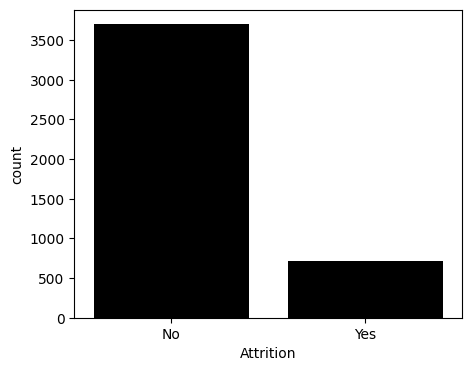

In [44]:
plt.figure(
    figsize=(5,4)
    )

sns.countplot(
    data=data_final_cat,
    x=data_final_cat["Attrition"],
    color="black"
    )

plt.show()

In [45]:
data_final_cat["Education"].value_counts()

Education
Bachelor         1716
Master           1194
College           846
Below College     510
Doctor            144
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\4103351427.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='Education', ylabel='count'>

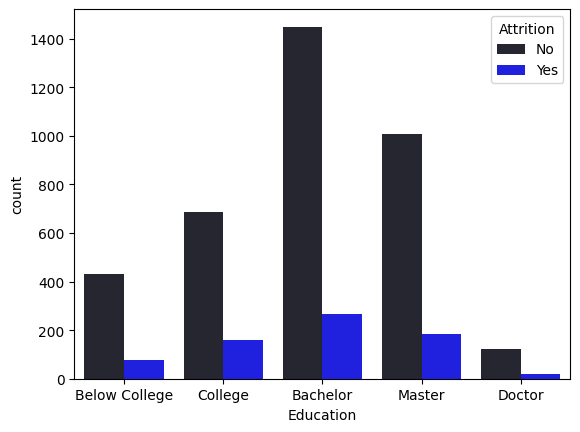

In [46]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["Education"],
    hue="Attrition",
    color="blue"
    )

> Op het eerste gezicht lijkt het dat de meeste werknemers bij de organisatie blijven

In [47]:
data_final_cat["EducationField"].value_counts()

EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\3668682929.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='EducationField', ylabel='count'>

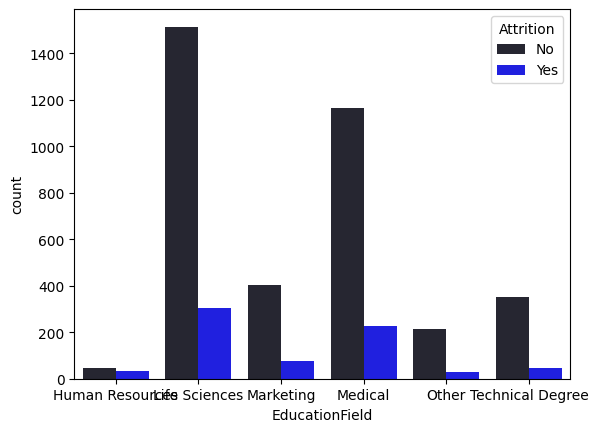

In [48]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["EducationField"],
    hue="Attrition",
    color="blue",
    )

>Verloop is het hoogst bij HR, maar heeft aanzienlijk minder werknemers

In [49]:
data_final_cat["Gender"].value_counts()

Gender
Male      2646
Female    1764
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\1254852197.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='Gender', ylabel='count'>

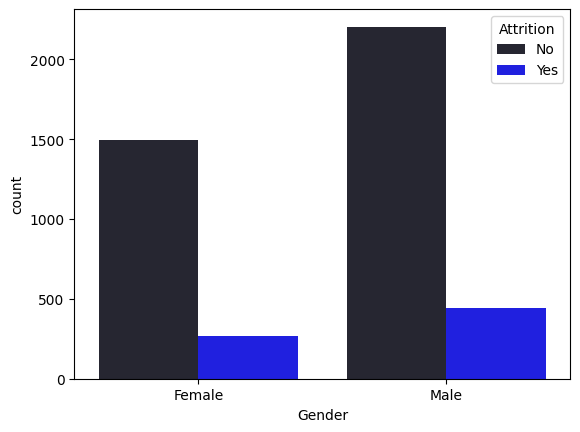

In [50]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["Gender"],
    hue="Attrition",
    color="blue"
    )

> Verloop onder mannen en vrouwen lijken gemiddeld hetzelfde; vrouwen wellicht iets meer ten opzichte van totale aantal vrouwen

In [51]:
data_final_cat["Department"].value_counts()

Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\3145227826.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='Department', ylabel='count'>

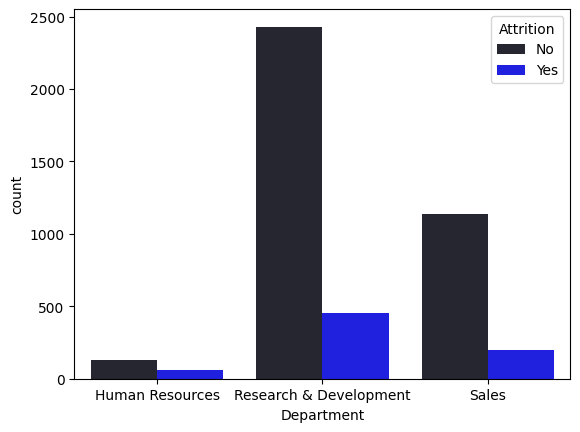

In [52]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["Department"],
    hue="Attrition",
    color="blue"
    )

In [53]:
data_final_cat["BusinessTravel"].value_counts()

BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\57046622.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='BusinessTravel', ylabel='count'>

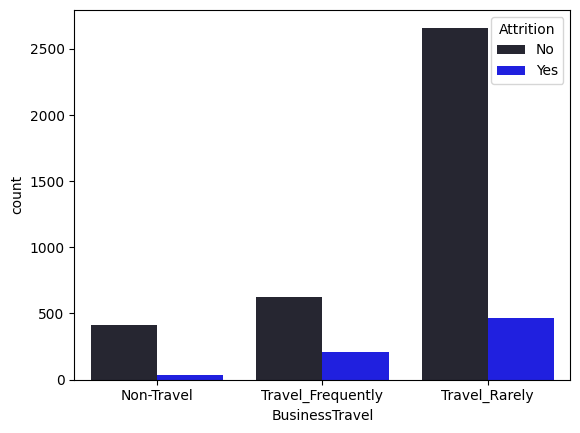

In [54]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["BusinessTravel"],
    hue="Attrition",
    color="blue"
    )

In [55]:
data_final_cat["MaritalStatus"].value_counts()

MaritalStatus
Married     2019
Single      1410
Divorced     981
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\350261642.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='MaritalStatus', ylabel='count'>

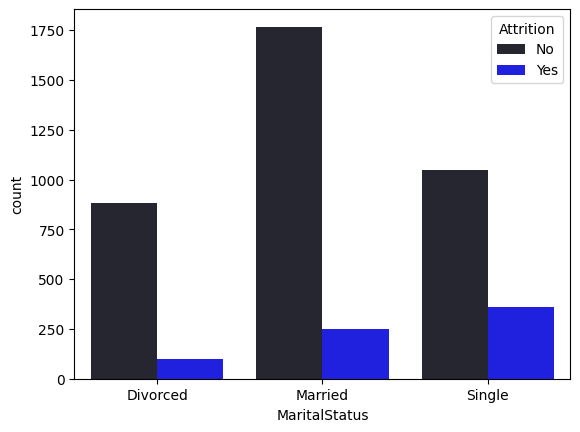

In [56]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["MaritalStatus"],
    hue="Attrition",
    color="blue"
    )

> Single mensen gaan sneller weg dan gescheiden/gehuwde mensen

In [57]:
data_final_cat["JobLevel"].value_counts()

JobLevel
Entry       1629
Mid         1602
Senior       654
Manager      318
Director     207
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\2506088990.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='JobLevel', ylabel='count'>

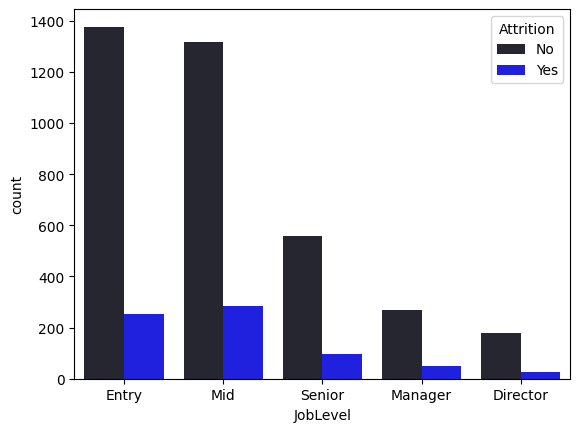

In [58]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["JobLevel"],
    hue="Attrition",
    color="blue"
    )

In [59]:
data_final_cat["StockOptionLevel"].value_counts()

StockOptionLevel
Low          1893
Medium       1788
High          474
Very High     255
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\3218466482.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='StockOptionLevel', ylabel='count'>

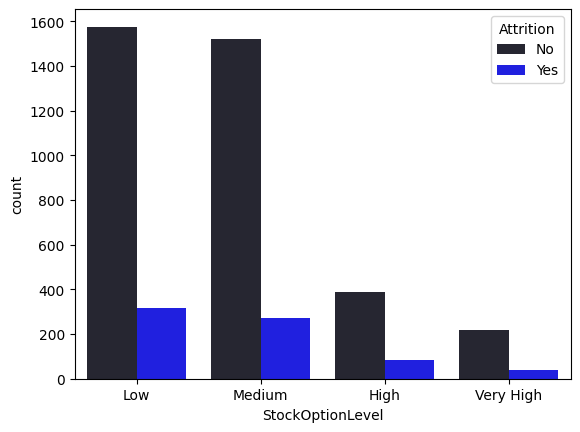

In [60]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["StockOptionLevel"],
    hue="Attrition",
    color="blue"
    )

In [61]:
data_final_cat["StandardHours"].value_counts()

StandardHours
8    4410
Name: count, dtype: int64

> Iedereen werkt 8u, hebben daadwerkelijk werktijd een relatie met het verloop?

In [62]:
data_final_cat["NumCompaniesWorked"].value_counts()

NumCompaniesWorked
1    1558
0     586
3     493
2     438
4     415
7     222
6     208
5     187
9     156
8     147
Name: count, dtype: Int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\1469240746.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

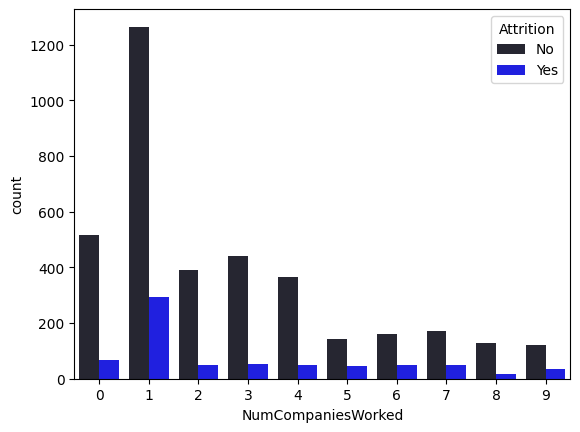

In [63]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["NumCompaniesWorked"],
    hue="Attrition",
    color="blue"
    )

> Het meeste verloop zit bij werknemers met weinig voorgaande werkgevers

In [64]:
data_final_cat["TrainingTimesLastYear"].value_counts()

TrainingTimesLastYear
2    1641
3    1473
4     369
5     357
1     213
6     195
0     162
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\1538460749.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='TrainingTimesLastYear', ylabel='count'>

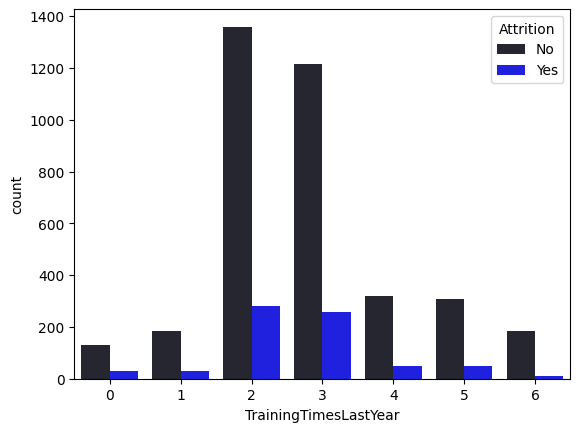

In [65]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["TrainingTimesLastYear"],
    hue="Attrition",
    color="blue"
    )

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\655828906.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='PerformanceRating', ylabel='count'>

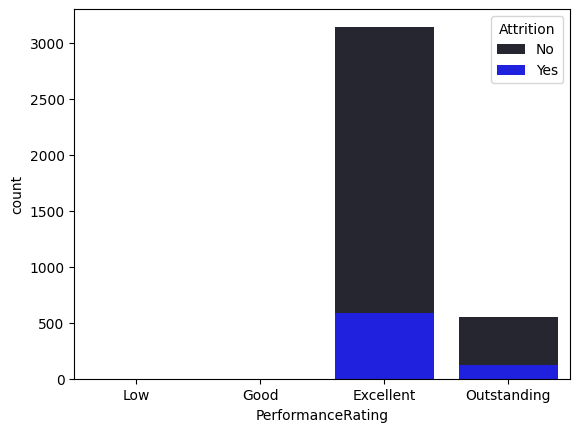

In [66]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["PerformanceRating"],
    hue="Attrition",
    color="blue"
    )

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\2595773144.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='JobSatisfaction', ylabel='count'>

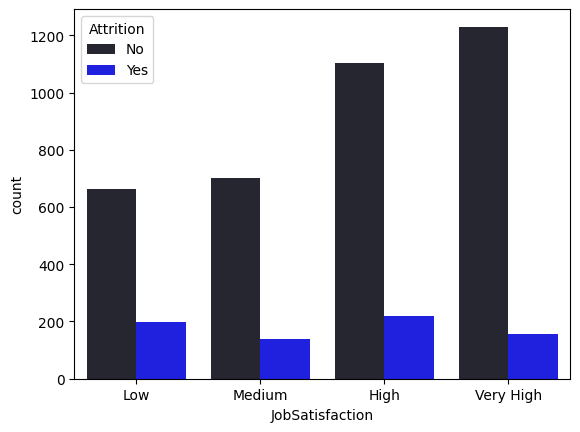

In [67]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["JobSatisfaction"],
    hue="Attrition",
    color="blue"
    )

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\1942300761.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

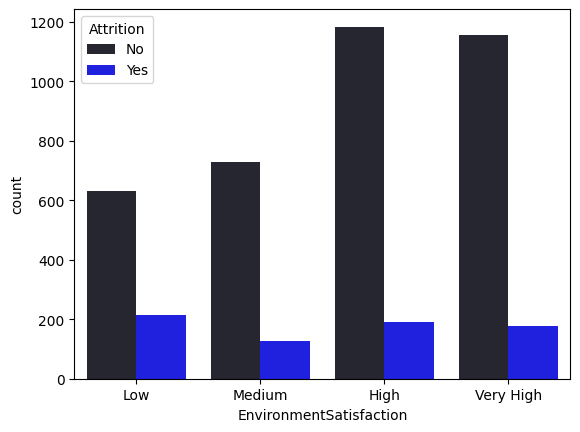

In [68]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["EnvironmentSatisfaction"],
    hue="Attrition",
    color="blue"
    )

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\2945613192.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='WorkLifeBalance', ylabel='count'>

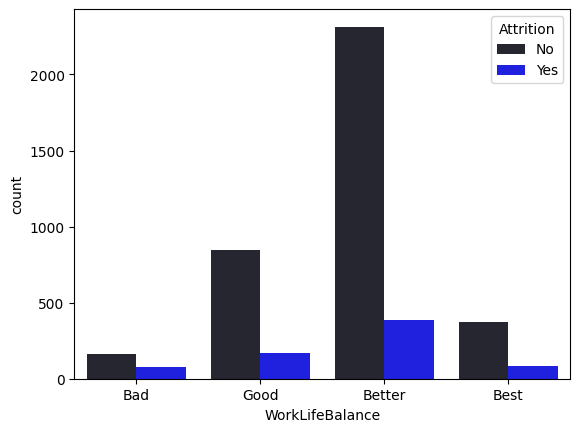

In [69]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["WorkLifeBalance"],
    hue="Attrition",
    color="blue"
    )

In [70]:
data_final_cat["YearsWithCurrManager"].value_counts()

YearsWithCurrManager
2     1032
0      789
7      648
3      426
8      321
4      294
1      228
9      192
5       93
6       87
10      81
11      66
12      54
13      42
17      21
15      15
14      15
16       6
Name: count, dtype: int64

<Axes: xlabel='YearsWithCurrManager', ylabel='Count'>

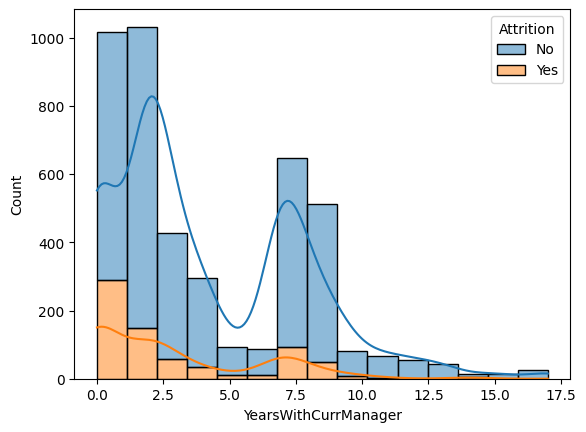

In [71]:
sns.histplot(
    data=data_final_cat,
    x=data_final_cat["YearsWithCurrManager"],
    hue="Attrition",
    kde=True,
    bins=15,
    multiple="stack"
    )

> Het hoogste verloop ligt bij werknemers die minder dan een jaar bij hun manager zitten

In [72]:
data_final_cat["YearsSinceLastPromotion"].value_counts()

YearsSinceLastPromotion
0     1743
1     1071
2      477
7      228
4      183
3      156
5      135
6       96
11      72
8       54
9       51
15      39
13      30
12      30
14      27
10      18
Name: count, dtype: int64

<Axes: xlabel='YearsSinceLastPromotion', ylabel='Count'>

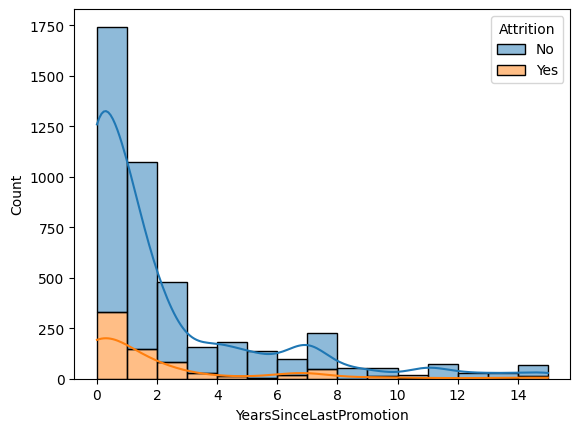

In [73]:
sns.histplot(
    data=data_final_cat,
    x=data_final_cat["YearsSinceLastPromotion"],
    hue="Attrition",
    kde=True,
    bins=15,
    multiple="stack"
    )

<Axes: xlabel='Age', ylabel='Count'>

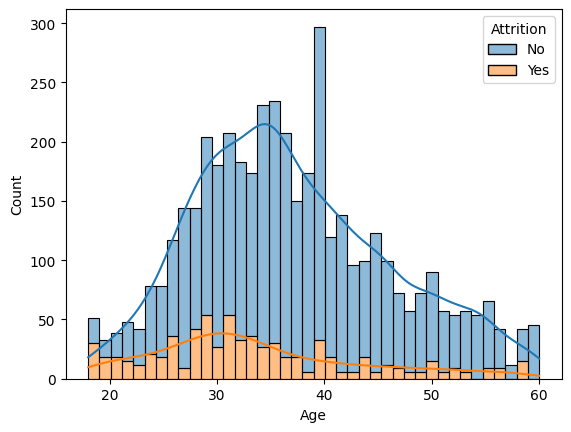

In [74]:
sns.histplot(
    data=data_final_cat,
    x=data_final_cat["Age"],
    hue="Attrition",
    kde=True,
    bins=40,
    multiple="stack"
    )

> Jongere werknemers gaan eerder weg dan oudere

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

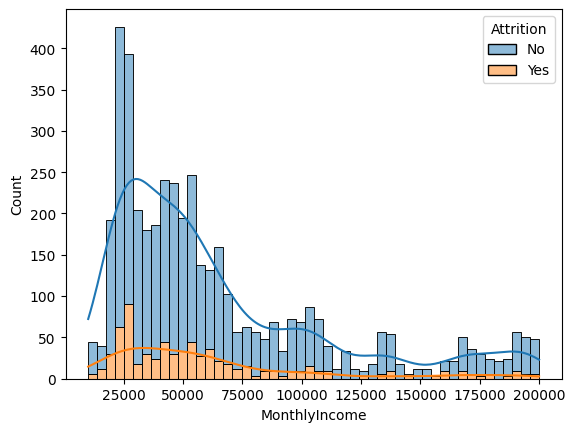

In [75]:
sns.histplot(
    data=data_final_cat,
    x=data_final_cat["MonthlyIncome"],
    hue="Attrition",
    kde=True,
    bins=50,
    multiple="stack"
    )

> Werknemers met laag inkomen gaan eerder weg en dit zijn ook de meeste werknemers in dienst

<Axes: xlabel='PercentSalaryHike', ylabel='Count'>

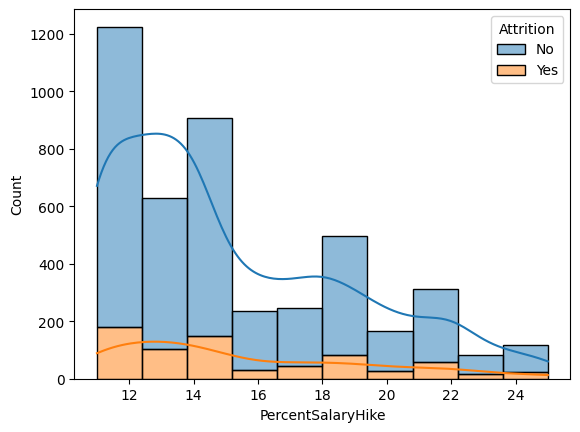

In [76]:
sns.histplot(
    data=data_final_cat,
    x=data_final_cat["PercentSalaryHike"],
    hue="Attrition",
    kde=True,
    bins=10,
    multiple="stack"
    )

<Axes: xlabel='YearsAtCompany', ylabel='Count'>

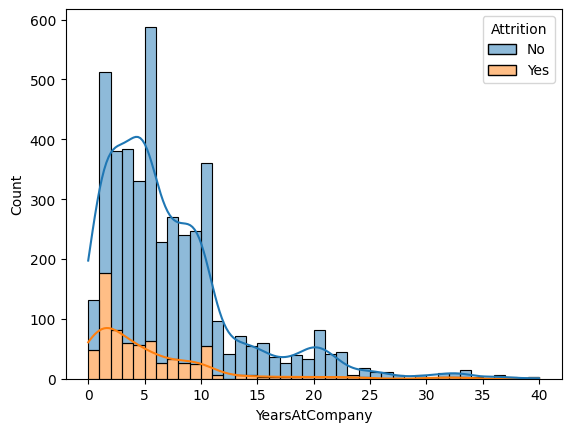

In [77]:
sns.histplot(
    data=data_final_cat,
    x=data_final_cat["YearsAtCompany"],
    hue="Attrition",
    kde=True,
    bins=40,
    multiple="stack"
    )

> De meeste werknemers gaan in hun eerste en tweede jaar weg

### Nieuwe features analyseren

In [78]:
data_final_cat.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Time_worked_hours',
       'Average_worked_hours', 'Average_total_absence_days',
       'Average_total_absence_hours'],
      dtype='object')

<Axes: xlabel='Average_worked_hours', ylabel='Count'>

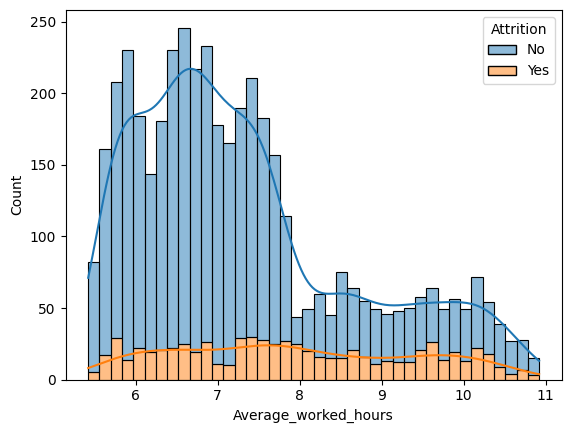

In [79]:
sns.histplot(
    data=data_final_cat,
    x=data_final_cat["Average_worked_hours"],
    hue="Attrition",
    kde=True,
    bins=40,
    multiple="stack"
    )

<Axes: xlabel='Time_worked_hours', ylabel='Count'>

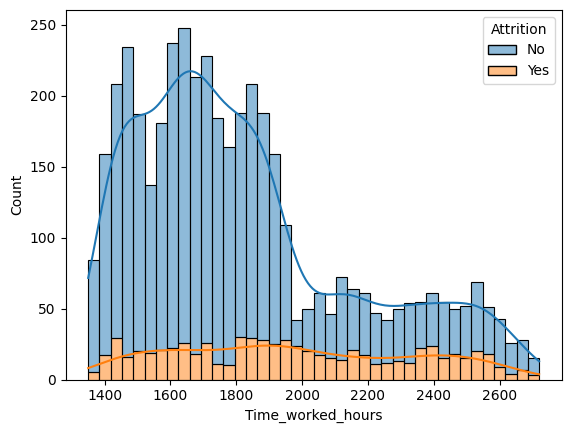

In [80]:
sns.histplot(
    data=data_final_cat,
    x=data_final_cat["Time_worked_hours"],
    hue="Attrition",
    kde=True,
    bins=40,
    multiple="stack"
    )

<Axes: xlabel='Average_worked_hours', ylabel='Count'>

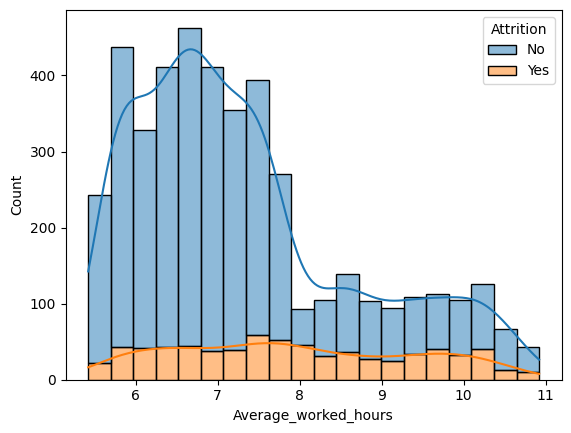

In [81]:
sns.histplot(
    data=data_final_cat,
    x=data_final_cat["Average_worked_hours"],
    hue="Attrition",
    kde=True,
    bins=20,
    multiple="stack"
    )

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\525317207.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='Average_total_absence_days', ylabel='count'>

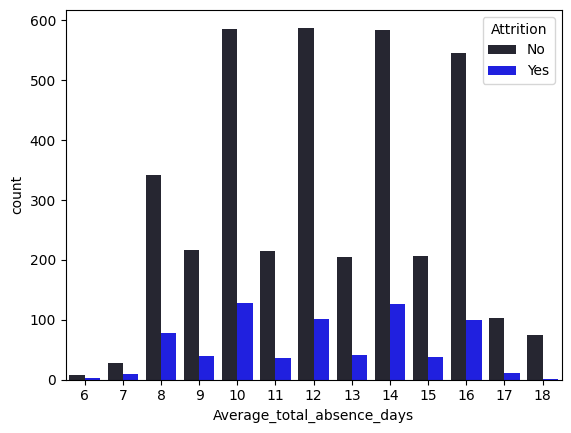

In [82]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["Average_total_absence_days"],
    hue="Attrition",
    color="blue"
    )

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8528\764069610.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='Average_total_absence_hours', ylabel='count'>

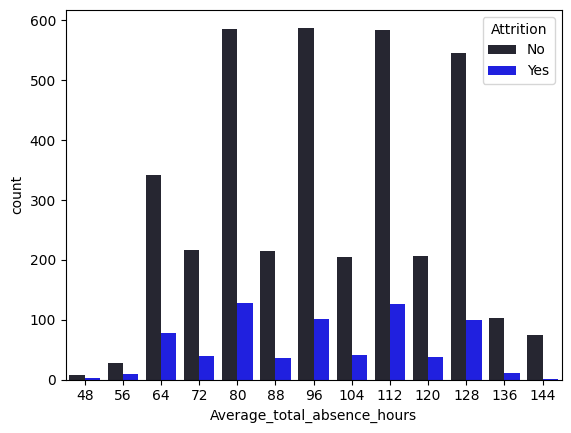

In [83]:
sns.countplot(
    data=data_final_cat,
    x= data_final_cat["Average_total_absence_hours"],
    hue="Attrition",
    color="blue"
    )

## Bivariate Analysis

### LabelEncoder voor de categorische kolommen

In [84]:
LE = LabelEncoder()

# Selecteer alle categorische kolommen in nummerieke subset
cat_columns = data_final_num.select_dtypes(include='object').columns

# Loop over de categorische kolommen
for column in cat_columns:
    
    # Pas de LabelEncoder toe op de kolom
    data_final_num[column] = LE.fit_transform(data_final_num[column])

# Resultaat
data_final_num.dtypes

Age                            int64
Attrition                      int32
BusinessTravel                 int32
Department                     int32
DistanceFromHome               int64
Education                      int64
EducationField                 int32
EmployeeCount                  int64
EmployeeID                     int64
Gender                         int32
JobLevel                       int64
JobRole                        int32
MaritalStatus                  int32
MonthlyIncome                  int64
NumCompaniesWorked             Int64
PercentSalaryHike              int64
StandardHours                  int64
StockOptionLevel               int64
TotalWorkingYears              Int64
TrainingTimesLastYear          int64
YearsAtCompany                 int64
YearsSinceLastPromotion        int64
YearsWithCurrManager           int64
EnvironmentSatisfaction        Int64
JobSatisfaction                Int64
WorkLifeBalance                Int64
JobInvolvement                 int64
P

### Heatmap voor correlatie

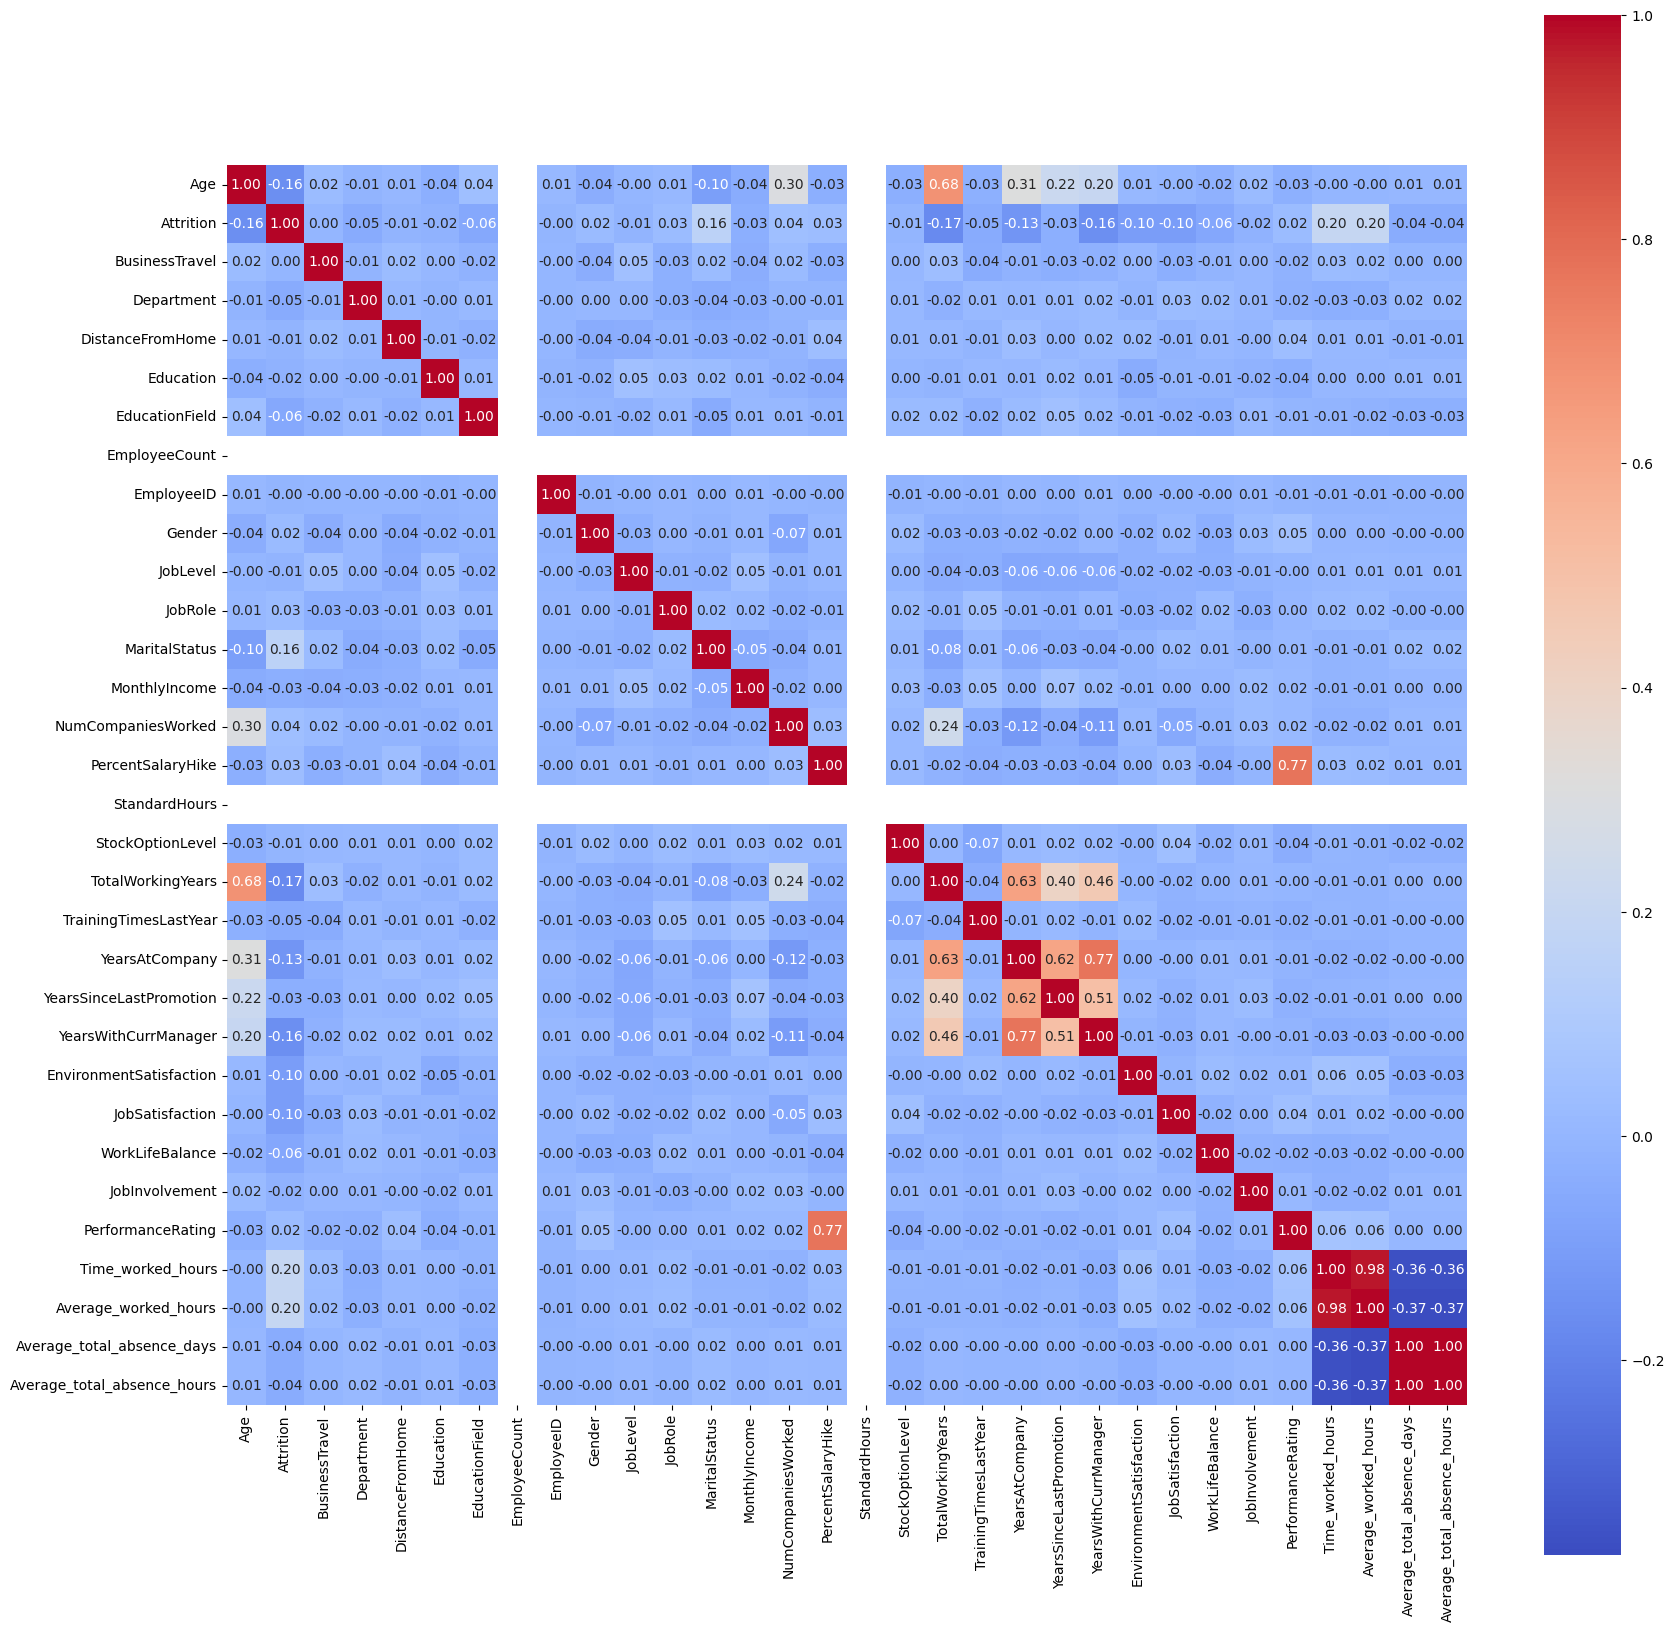

In [85]:
# Correlatie matrix
corr = data_final_num.corr()

# Plot de correlatie matrix
plt.figure(
    figsize=(20, 20)
    )

# Plot de heatmap
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    square=True,
    fmt='.2f'
    )

plt.show()

### Clean subset maken

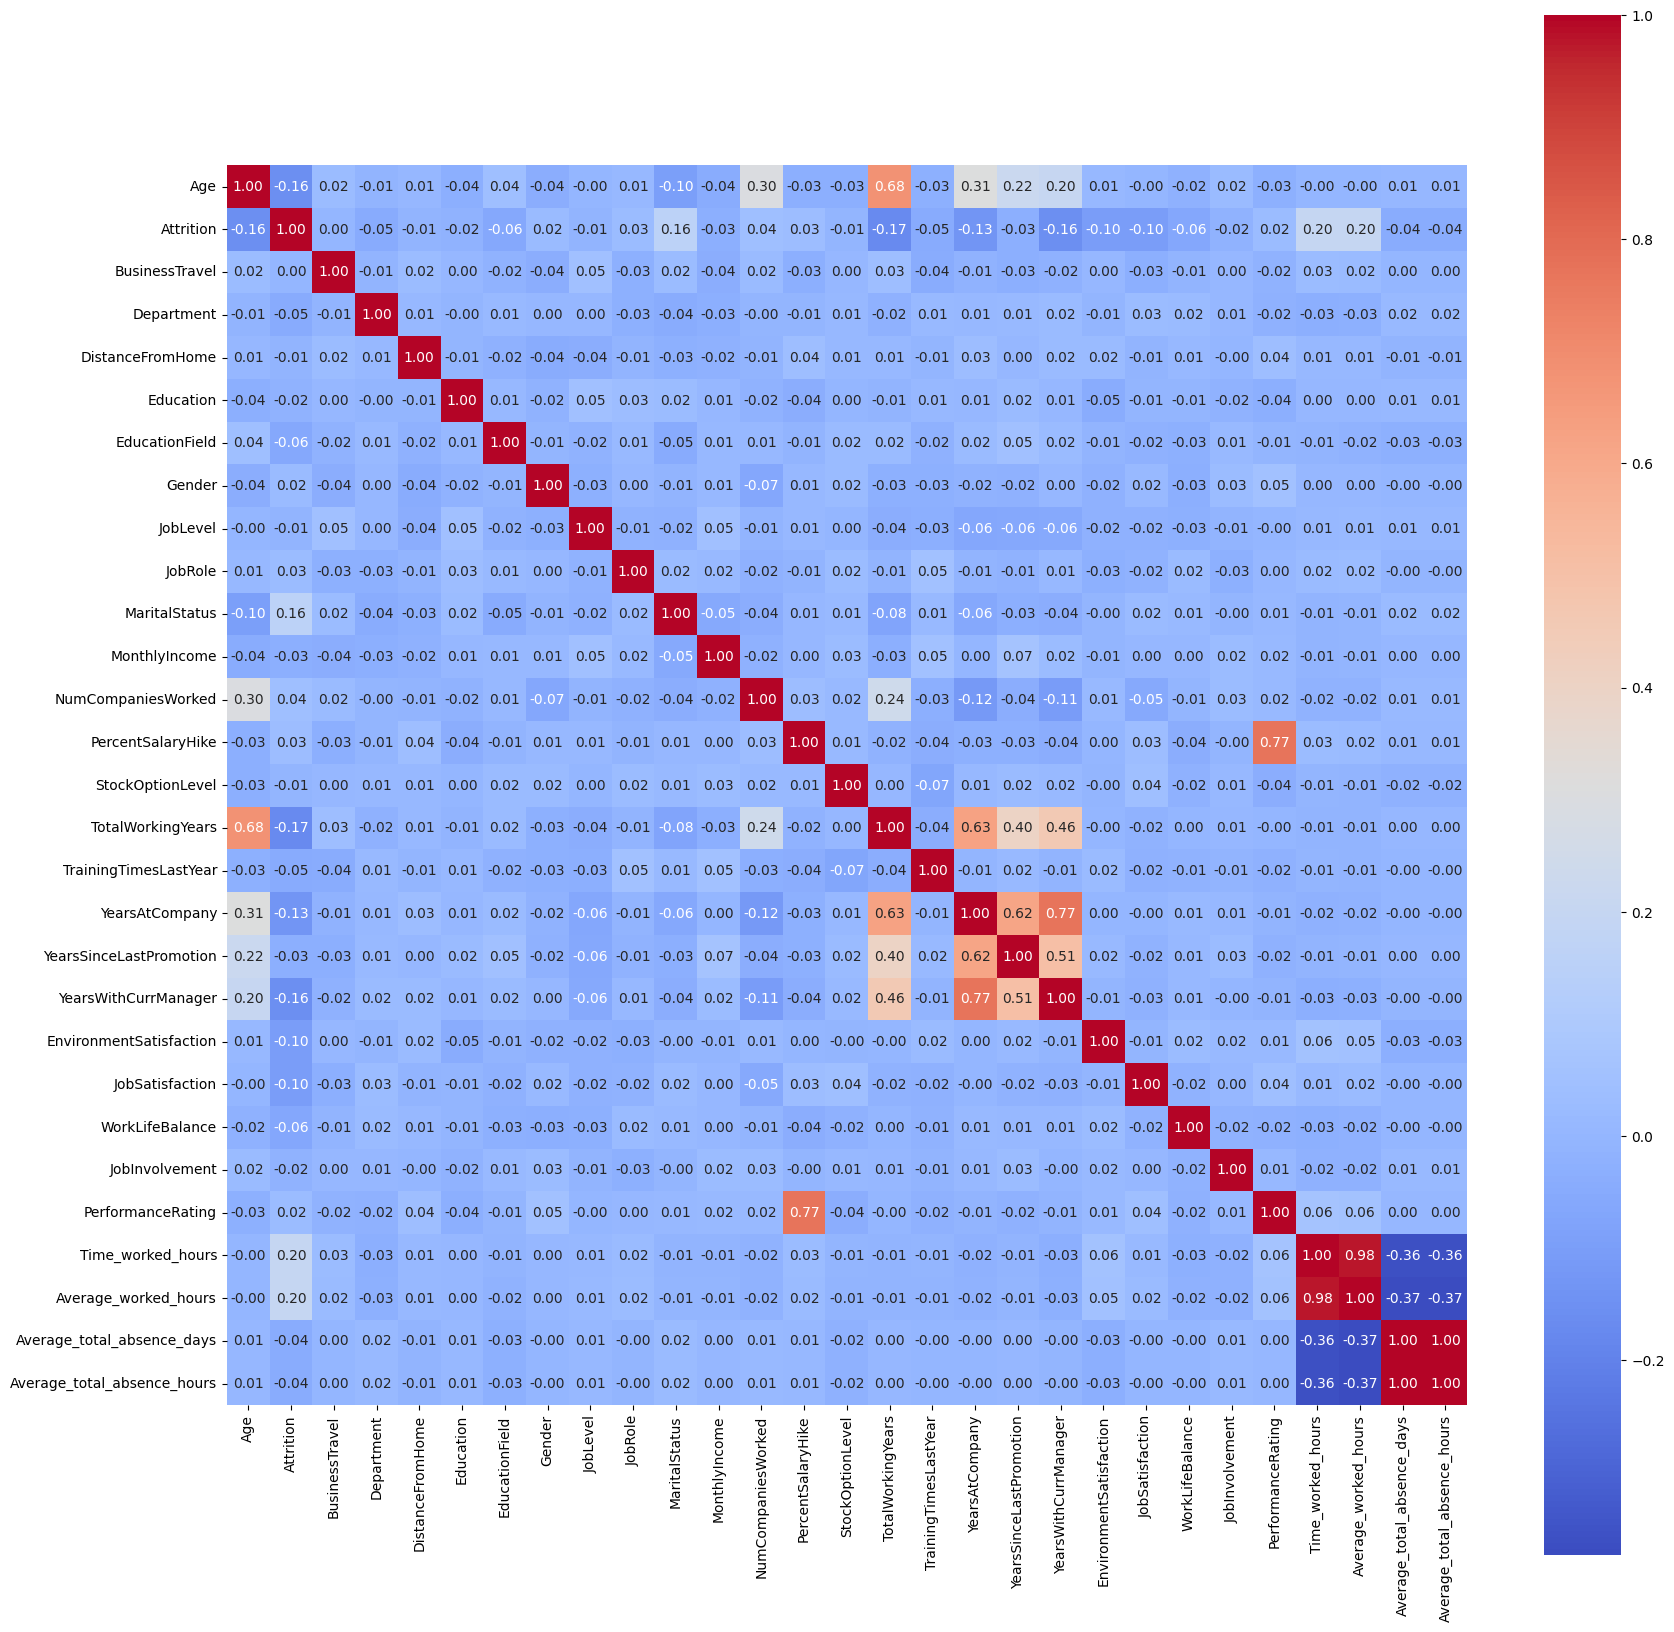

In [86]:
# Verwijder de kolommen EmployeeID, StandardHours en EmployeeCount
data_clean_heatmap = data_final_num.drop(
    columns=[
        'EmployeeID',
        'StandardHours',
        'EmployeeCount'
        ]
    )

# Nieuwe correlatie matrix
corr_clean = data_clean_heatmap.corr()

# Plot de nieuwe correlatie matrix
plt.figure(
    figsize=(20, 20)
    )

# Plot de heatmap
sns.heatmap(
    corr_clean,
    annot=True,
    cmap='coolwarm',
    square=True,
    fmt='.2f'
    )

plt.show()

> Attrition heeft een correlatie met MaritalStatus met een waarde van 0.16

1. TotalWorkingYears heeft een correlatie met Age en NumCompaniesWorked met een waarde van 0.68 en 0.24 respectievelijk
2. YearsAtCompany heeft een correlatie met Age en TotalWorkingYears met een waarde van 0.31 en 0.63 respectievelijk
3. YearsSinceLastPromotion heeft een correlatie met Age en TotalWorkingYears met een waarde van 0.22 en 0.4 respectievelijk
4. YearsWithCurrManager heeft een correlatie met Age, TotalWorkingYears, YearsAtCompany en YearsSinceLastPromotion met een waarde van 0.2, 0.46, 0.77 en 0.51 respectievelijk
5. PerformanceRating heeft een correlatie met PercentSalaryHike met een waarde van 0.77

> De meest gecorreleerde variabelen zijn:

1. TotalWorkingYear en Age: 0.68
2. YearsAtCompany en TotalWorkingYears: 0.63
3. YearsSinceLastPromotion en YearsAtCompany: 0.62
4. YearsWithCurrManager en YearsAtCompany: 0.77
5. PerformanceRating en PercentSalaryHike: 0.77

### Features behouden met hoge correlatie en nieuwe maken

In [87]:
# Nieuwe features
data_final_num['Total_Years_at_Company'] = data_final_num['TotalWorkingYears'] * data_final_num['YearsAtCompany']
data_final_num['Years_at_vs_Total_Years'] = data_final_num['YearsAtCompany'] / data_final_num['TotalWorkingYears']
data_final_num['Years_at_minus_Years_with_Manager'] = data_final_num['YearsAtCompany'] - data_final_num['YearsWithCurrManager']
data_final_num['Total_vs_Manager'] = data_final_num['TotalWorkingYears'] / data_final_num['YearsWithCurrManager']
data_final_num['Manager_vs_Total'] = data_final_num['YearsWithCurrManager'] / data_final_num['TotalWorkingYears']
data_final_num['TotalWorkingYears_squared'] = data_final_num['TotalWorkingYears'] ** 2
data_final_num['YearsAtCompany_squared'] = data_final_num['YearsAtCompany'] ** 2

In [88]:
# Scaler
scaler = StandardScaler()

# Features om te scalen
new_features = [
    'Total_Years_at_Company',
    'Years_at_vs_Total_Years',
    'Years_at_minus_Years_with_Manager',
    'Total_vs_Manager',
    'Manager_vs_Total',
    'TotalWorkingYears_squared',
    'YearsAtCompany_squared'
    ]

# Infinity waarden vervangen vanwege een foutmelding
data_final_num[new_features] = data_final_num[new_features].replace([np.inf, -np.inf], np.nan)

# StandardScaler toepassen
data_final_num[new_features] = scaler.fit_transform(data_final_num[new_features])

In [89]:
# Features behouden met hoge correlatie
features_to_keep = [
    'Age',
    'JobLevel',
    'MonthlyIncome',
    'PercentSalaryHike',
    'StockOptionLevel',
    'MaritalStatus',
    'NumCompaniesWorked',
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsWithCurrManager',
    'PerformanceRating',
    'Time_worked_hours',
    'Average_worked_hours',
    'Total_Years_at_Company',
    'Years_at_vs_Total_Years',
    'Years_at_minus_Years_with_Manager',
    'Total_vs_Manager',
    'Manager_vs_Total',
    'TotalWorkingYears_squared',
    'YearsAtCompany_squared'
    ]

final_data = data_final_num[['Attrition'] + features_to_keep]

X = final_data[features_to_keep]
y = final_data['Attrition']

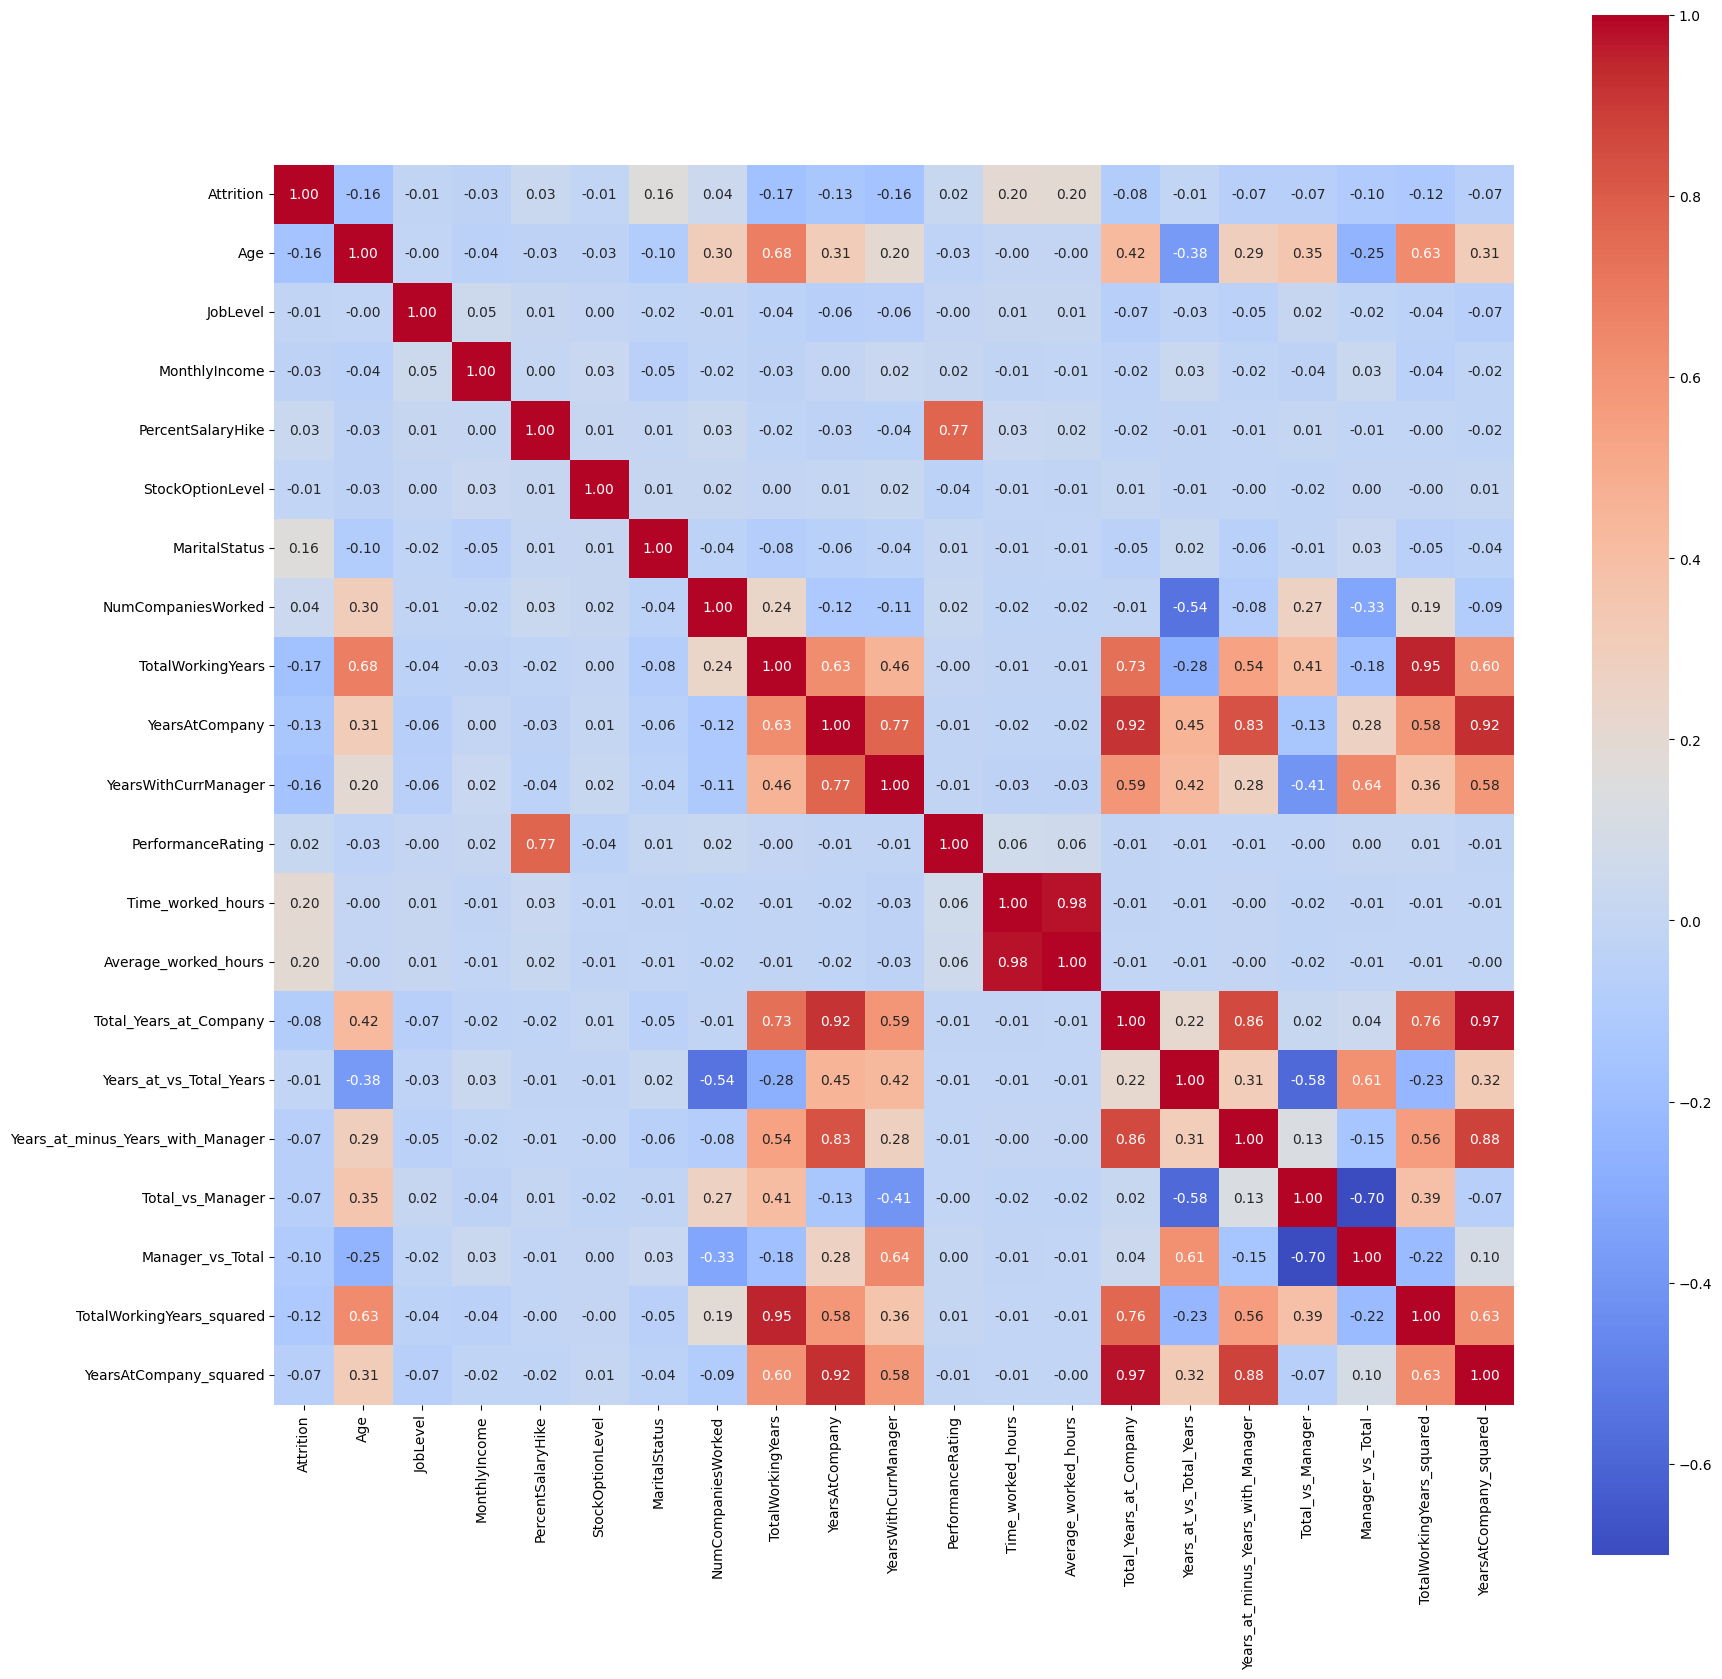

In [90]:
# Nieuwe correlatie matrix
corr_clean = final_data.corr()

# Plot de nieuwe correlatie matrix
plt.figure(
    figsize=(20, 20)
    )

# Plot de heatmap
sns.heatmap(
    corr_clean,
    annot=True,
    cmap='coolwarm',
    square=True,
    fmt='.2f'
    )

plt.show()

In [91]:
# Klassenbalans checken
y.value_counts()

Attrition
0    3699
1     711
Name: count, dtype: int64

## Train en Test split maken van data_final_num

In [92]:
# Inf waarden
X = X.replace([np.inf, -np.inf], np.nan)
y = y.replace([np.inf, -np.inf], np.nan)

# Imputer
imputer = SimpleImputer(strategy='mean')

# Imputer toepassen
X = imputer.fit_transform(X)
y = y.fillna(y.mode()[0])

# Split de dataset
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1,
    stratify=y
    )

# Omvang
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3087, 20), (1323, 20), (3087,), (1323,))

### SMOTE

> Klas balanceren voor dataset

In [93]:
# SMOTE toepassen vanwege onbalans
smote = SMOTE(
    sampling_strategy="minority", 
    random_state=2024)


# X_train omzetten naar int voor fit
X_train = X_train.astype(int)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Pipeline

Accuracy: 0.9690098261526833
Precision: 0.9574468085106383
Recall: 0.8450704225352113
F1 score: 0.8977556109725686
-------------------------------
Classification Report
-------------------------------
              precision    recall  f1-score   support

           0      0.971     0.993     0.982      1110
           1      0.957     0.845     0.898       213

    accuracy                          0.969      1323
   macro avg      0.964     0.919     0.940      1323
weighted avg      0.969     0.969     0.968      1323

Confusion_Matrix


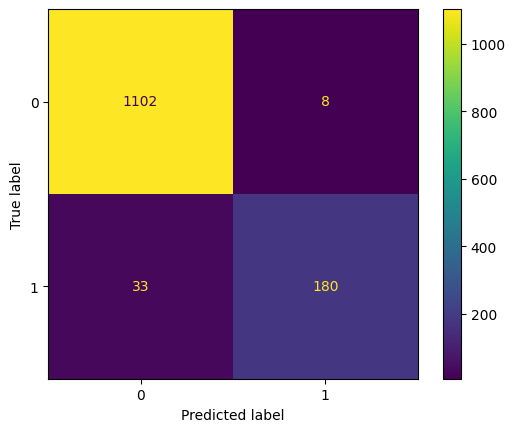

In [94]:
# Pipeline
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier()),
])

# Trainingdata fitten
pipeline.fit(X_train_resampled, y_train_resampled)

# Voorspelling
y_pred = pipeline.predict(X_test)

# Accuraatheid
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precisie
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1}")

rfc_pipeline_results = classification_report(y_test,y_pred,digits=3)

print("-------------------------------")
print("Classification Report")
print("-------------------------------")
print(rfc_pipeline_results)
print("Confusion_Matrix")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)

CMD.plot()

## RFC

RandomForestClassifier(max_features=1, n_estimators=400)
----------------------
Accuracy:[0.9659863945578231]
F1-Score:[0.8849104859335039]
Precision:[0.812206572769953]
Recall:[0.9719101123595506]
-------------------------------
Classification Report
-------------------------------
              precision    recall  f1-score   support

           0      0.965     0.995     0.980      1110
           1      0.972     0.812     0.885       213

    accuracy                          0.966      1323
   macro avg      0.968     0.904     0.932      1323
weighted avg      0.966     0.966     0.965      1323

Confusion_Matrix


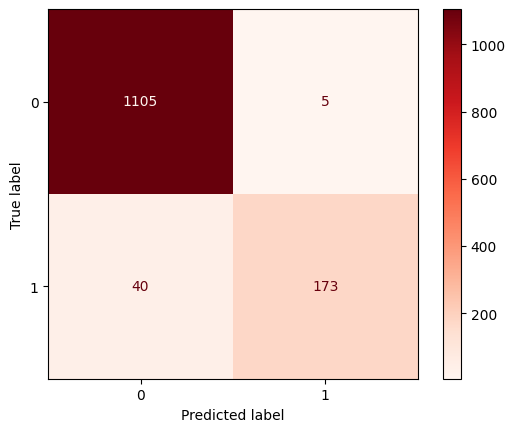

In [95]:
# Random Forest Classifier
rf=RandomForestClassifier()

# Hyperparameters
hyper_params = {
    "max_features": [1,3,10],
    "min_samples_split":[2,3,10],
    "min_samples_leaf":[1,3,10],
    "n_estimators":[100,300, 400, 500, 600],
    "criterion":["gini"]
    }

# GridSearchCV
GridSearchCVmodel = GridSearchCV(
    rf,
    hyper_params,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
    )

# Fit data
GridSearchCVmodel.fit(X_train_resampled,y_train_resampled)
y_pred= GridSearchCVmodel.predict(X_test)
print(GridSearchCVmodel.best_estimator_)

print("----------------------")

# Lege lists
accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]

# Scores toevoegen
accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))

# Resultaten
RFC_results = classification_report(y_test,y_pred,digits=3)

print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}") 
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classification Report")
print("-------------------------------")
print(RFC_results)
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Reds")
plt.show()

## GBC

GradientBoostingClassifier(min_samples_split=10, n_estimators=500)
----------------------
Accuracy:[0.9244142101284959]
F1-Score:[0.7524752475247525]
Precision:[0.7136150234741784]
Recall:[0.7958115183246073]
-------------------------------
Classification Report
-------------------------------
              precision    recall  f1-score   support

           0      0.946     0.965     0.955      1110
           1      0.796     0.714     0.752       213

    accuracy                          0.924      1323
   macro avg      0.871     0.839     0.854      1323
weighted avg      0.922     0.924     0.923      1323

Confusion_Matrix


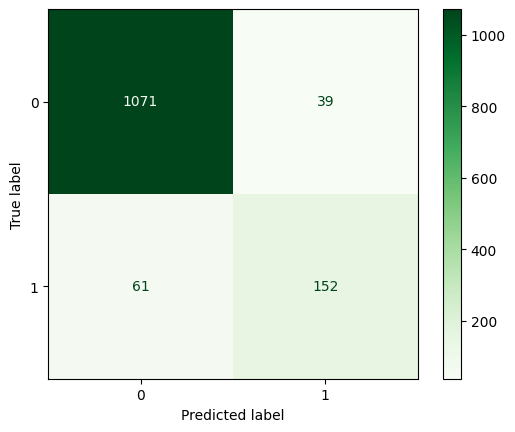

In [96]:
# Hyperparameters
gbc_param_grid = {
    "learning_rate": [0.05, 0.1, 0.02],
    "n_estimators": [100,200,300,400,500],
    "min_samples_split": [2,3,10],
    "min_samples_leaf": [1,3,10]
    }

gbc = GradientBoostingClassifier()

# GridSearchCV
gbc_model = GridSearchCV(
    gbc,
    gbc_param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
    )

# Fit data
gbc_model.fit(X_train_resampled, y_train_resampled)
y_pred = gbc_model.predict(X_test)
print(gbc_model.best_estimator_)

print("----------------------")

# Lege lists
accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]

# Scores toevoegen
accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))

# Resultaten
gbc_model_results = classification_report(y_test,y_pred,digits=3)

print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}") 
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classification Report")
print("-------------------------------")
print(gbc_model_results)
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Greens")
plt.show()

## VC

----------------------
Accuracy:[0.8291761148904006]
F1-Score:[0.5330578512396694]
Precision:[0.6056338028169014]
Recall:[0.47601476014760147]
-------------------------------
Classification Report
-------------------------------
              precision    recall  f1-score   support

           0      0.920     0.872     0.895      1110
           1      0.476     0.606     0.533       213

    accuracy                          0.829      1323
   macro avg      0.698     0.739     0.714      1323
weighted avg      0.849     0.829     0.837      1323

Confusion_Matrix


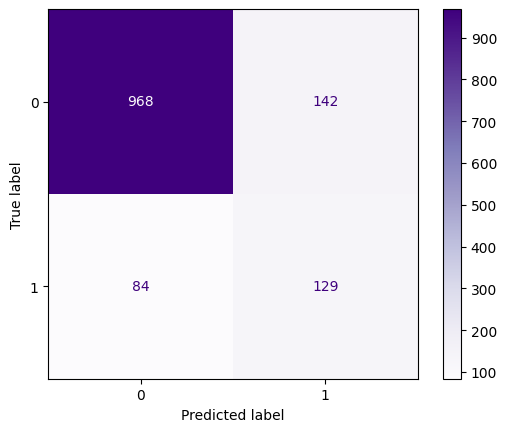

In [97]:
voting_model= VotingClassifier(
    estimators=[
        ('gradient_boosting1', gbc),
        ('gradient_boosting2', gbc),
        ('gradient_boosting3', gbc),
        ('gradient_boosting4',gbc),
        ('gradient_boosting5',gbc)],
    voting='hard',
    n_jobs=-1
    )

# Fit data
voting_model.fit(X_train_resampled, y_train_resampled)
y_pred=voting_model.predict(X_test)

print("----------------------")

# Lege lists
accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]

# Scores toevoegen
accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))

# Resultaten
vc_results = classification_report(y_test,y_pred,digits=3)

print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}") 
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classification Report")
print("-------------------------------")
print(vc_results)
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Purples")
plt.show()

## Beste model

In [98]:
print("RFC Pipeline Results\n")
print(rfc_pipeline_results)
print("\n--------------------------")
print("\nRFC GridSearchCV Results\n")
print(RFC_results)
print("\n--------------------------")
print("\nGBC GridSearchCV Results\n")
print(gbc_model_results)
print("\n--------------------------")
print("\nVoting Classifier Results\n")
print(vc_results)

RFC Pipeline Results

              precision    recall  f1-score   support

           0      0.971     0.993     0.982      1110
           1      0.957     0.845     0.898       213

    accuracy                          0.969      1323
   macro avg      0.964     0.919     0.940      1323
weighted avg      0.969     0.969     0.968      1323


--------------------------

RFC GridSearchCV Results

              precision    recall  f1-score   support

           0      0.965     0.995     0.980      1110
           1      0.972     0.812     0.885       213

    accuracy                          0.966      1323
   macro avg      0.968     0.904     0.932      1323
weighted avg      0.966     0.966     0.965      1323


--------------------------

GBC GridSearchCV Results

              precision    recall  f1-score   support

           0      0.946     0.965     0.955      1110
           1      0.796     0.714     0.752       213

    accuracy                          0.924      1